In [1]:
!pip install kaggle


In [2]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
plantdisease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [5]:
import os
print(os.listdir())

['.config', 'PlantVillage', 'kaggle.json', 'plantdisease.zip', 'plantvillage', 'sample_data']


In [6]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
DATASET_PATH = "PlantVillage"

In [8]:
classes = os.listdir(DATASET_PATH)
print("Total Classes:", len(classes))
print(classes[:10])

Total Classes: 15
['Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Potato___Late_blight', 'Tomato__Tomato_mosaic_virus', 'Tomato_Septoria_leaf_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Potato___Early_blight', 'Tomato_Bacterial_spot']


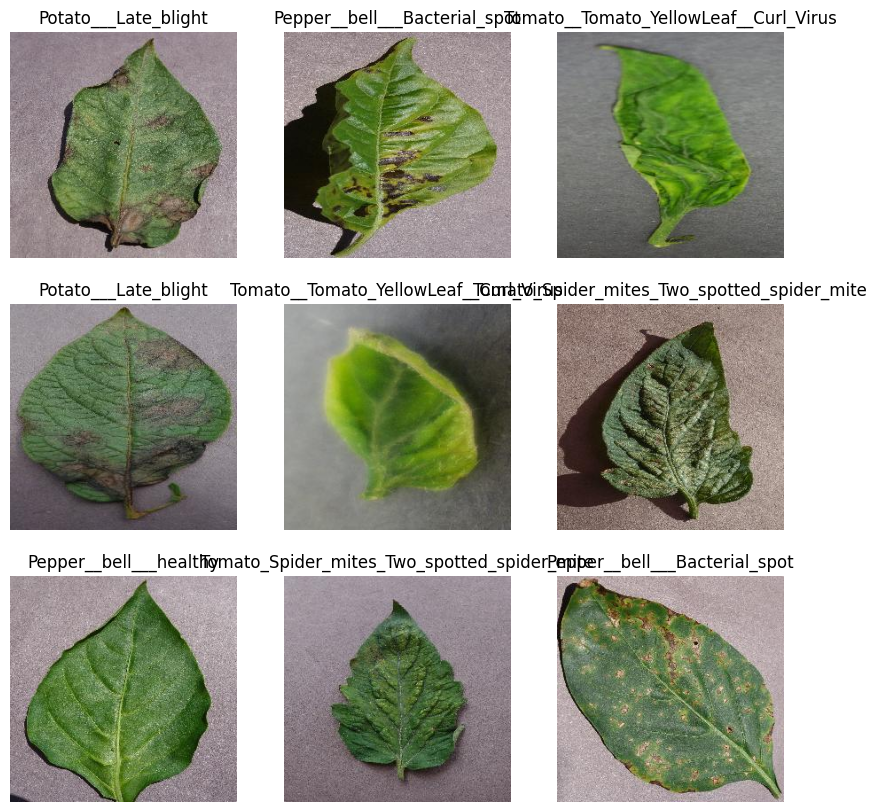

In [9]:
plt.figure(figsize=(10,10))

for i in range(9):
    class_name = random.choice(classes)
    class_path = os.path.join(DATASET_PATH, class_name)

    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)

    img = Image.open(img_path)

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.show()

In [10]:
import os
from PIL import Image
import numpy as np

DATASET_PATH = "PlantVillage"

widths = []
heights = []
bad_files = 0

for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            img = Image.open(img_path)
            widths.append(img.size[0])
            heights.append(img.size[1])
        except:
            bad_files += 1
            continue

print("Average Width:", int(np.mean(widths)))
print("Average Height:", int(np.mean(heights)))
print("Bad files skipped:", bad_files)

Average Width: 256
Average Height: 256
Bad files skipped: 1


In [1]:
import os
import numpy as np
from PIL import Image

IMG_SIZE = 224
DATASET_PATH = "PlantVillage"

images = []
labels = []
bad_files = 0

class_names = os.listdir(DATASET_PATH)

for label, class_name in enumerate(class_names):
    class_path = os.path.join(DATASET_PATH, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize((IMG_SIZE, IMG_SIZE))
            img_array = np.array(img)

            images.append(img_array)
            labels.append(label)
        except:
            bad_files += 1
            continue

images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("Bad files skipped:", bad_files)

Images shape: (20638, 224, 224, 3)
Labels shape: (20638,)
Bad files skipped: 1


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
DATASET_PATH = "PlantVillage"
IMG_SIZE = 224
BATCH_SIZE = 32

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

num_classes = train_generator.num_classes
print("Classes:", num_classes)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Classes: 15


In [5]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation="softmax"))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,895 (42.61 MB)

 Trainable params: 11,170,895 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 253s 474ms/step - accuracy: 0.2633 - loss: 2.2980 - val_accuracy: 0.5961 - val_loss: 1.4183
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 240s 464ms/step - accuracy: 0.5040 - loss: 1.5901 - val_accuracy: 0.6584 - val_loss: 1.1051
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 238s 460ms/step - accuracy: 0.5784 - loss: 1.3396 - val_accuracy: 0.7120 - val_loss: 0.9141
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 237s 459ms/step - accuracy: 0.6073 - loss: 1.2097 - val_accuracy: 0.7593 - val_loss: 0.7807
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 238s 459ms/step - accuracy: 0.6382 - loss: 1.1040 - val_accuracy: 0.7712 - val_loss: 0.7256
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 237s 458ms/step - accuracy: 0.6584 - loss: 1.0367 - val_accuracy: 0.7933 - val_loss: 0.6591
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 238s 460ms/step - accuracy: 0.6810 - loss: 0.9794 - val_accuracy: 0.8142 - val_loss: 0.5940
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 261s 458ms/step - accuracy: 0.7018 -

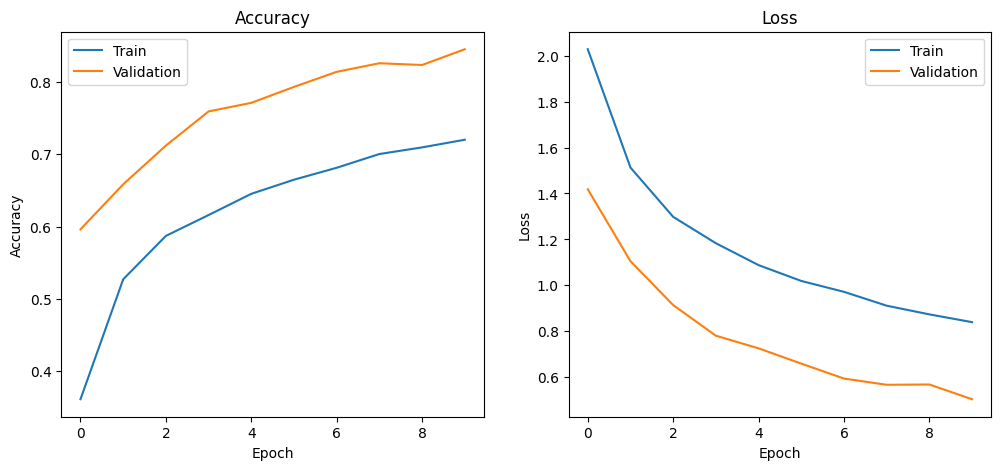

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])

plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])

plt.show()

In [11]:
model.save("plant_disease_model.h5")
print("Model saved.")

Model saved.


In [9]:
model_filename = 'plant_disease_model.h5'
model.save(model_filename)
print(f"Model saved as {model_filename}")

Model saved as plant_disease_model.h5


To download the saved model to your local machine, you can use the `files.download` function from `google.colab`:

In [10]:
from google.colab import files

files.download('plant_disease_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [13]:
# Get true labels
y_true = val_generator.classes

# Predict
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

class_labels = list(val_generator.class_indices.keys())

129/129 ━━━━━━━━━━━━━━━━━━━━ 47s 362ms/step


In [14]:
print(classification_report(y_true, y_pred, target_names=class_labels))

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.04      0.05      0.04       199
                     Pepper__bell___healthy       0.06      0.06      0.06       295
                      Potato___Early_blight       0.04      0.04      0.04       200
                       Potato___Late_blight       0.06      0.06      0.06       200
                           Potato___healthy       0.00      0.00      0.00        30
                      Tomato_Bacterial_spot       0.09      0.09      0.09       425
                        Tomato_Early_blight       0.04      0.02      0.03       200
                         Tomato_Late_blight       0.09      0.10      0.09       381
                           Tomato_Leaf_Mold       0.05      0.04      0.05       190
                  Tomato_Septoria_leaf_spot       0.08      0.09      0.09       354
Tomato_Spider_mites_Two_spotted_spider_mite       0.07      0.08

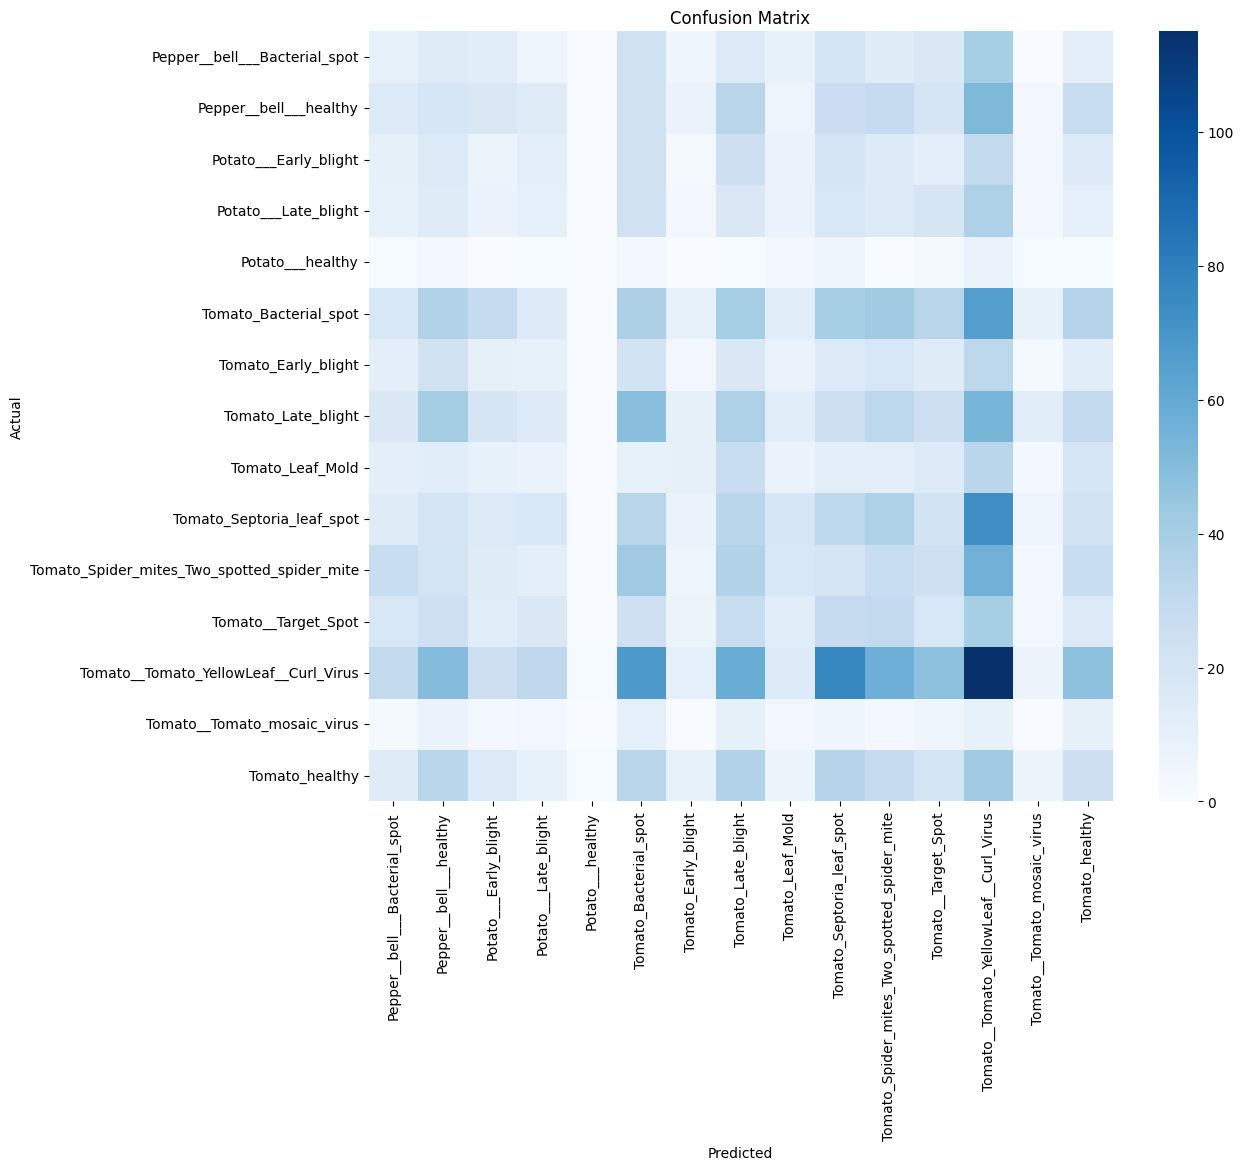

In [15]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()